In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic = pd.read_csv('Titanic-Dataset.csv')

# Display basic info
print(titanic.info())
print(titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [2]:
# Check for missing values
print(titanic.isnull().sum())

# Fill missing Age with median (better than mean for skewed distributions)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing Embarked with mode (most frequent value)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Cabin has too many missing values - we'll drop it
titanic.drop('Cabin', axis=1, inplace=True)

# Fill missing Fare with median
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\yuvan\AppData\Local\Temp\ipykernel_22624\3436719550.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\yuvan\AppData\Local\Temp\ipykernel_22624\3436719550.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [3]:
# Create FamilySize feature
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# Create IsAlone feature
titanic['IsAlone'] = 0
titanic.loc[titanic['FamilySize'] == 1, 'IsAlone'] = 1

# Extract titles from names
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

In [4]:
# Convert categorical features to numerical
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic['Title'] = titanic['Title'].map(title_mapping)
titanic['Title'] = titanic['Title'].fillna(0)

# Convert sex to numerical
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# One-hot encoding for Embarked
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic.drop('Embarked', axis=1, inplace=True)

In [5]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
features_to_scale = ['Age', 'Fare', 'FamilySize']

# Initialize scaler
scaler = StandardScaler()

# Scale features
titanic[features_to_scale] = scaler.fit_transform(titanic[features_to_scale])

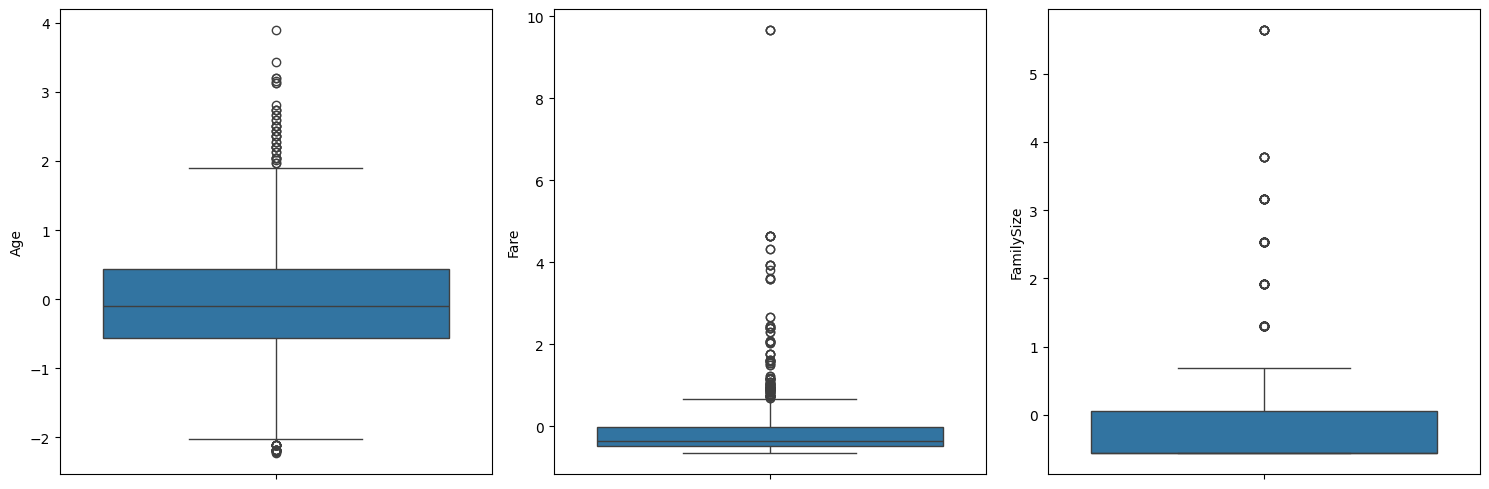

In [6]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=titanic['Age'])
plt.subplot(1, 3, 2)
sns.boxplot(y=titanic['Fare'])
plt.subplot(1, 3, 3)
sns.boxplot(y=titanic['FamilySize'])
plt.tight_layout()
plt.show()

# Handle outliers in Fare (cap at 95th percentile)
fare_upper_limit = titanic['Fare'].quantile(0.95)
titanic.loc[titanic['Fare'] > fare_upper_limit, 'Fare'] = fare_upper_limit

In [7]:
# Drop columns that won't be useful for modeling
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [8]:
print(titanic.head())
print(titanic.info())

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  FamilySize  \
0         0       3    0 -0.565736      1      0 -0.502445    0.059160   
1         1       1    1  0.663861      1      0  0.786845    0.059160   
2         1       3    1 -0.258337      0      0 -0.488854   -0.560975   
3         1       1    1  0.433312      1      0  0.420730    0.059160   
4         0       3    0  0.433312      0      0 -0.486337   -0.560975   

   IsAlone  Title  Embarked_C  Embarked_Q  Embarked_S  
0        0      1       False       False        True  
1        0      3        True       False       False  
2        1      2       False       False        True  
3        0      3       False       False        True  
4        1      1       False       False        True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null   